<a href="https://colab.research.google.com/github/SaraKarim23/Random-Forest-Classifier--Pima-Indians-Diabetes-Database/blob/main/Random_Forest_Classifier_Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:


df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:


X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 



In [5]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [6]:
random_forest = RandomForestClassifier().fit(X_train,y_train)

In [7]:


random_forest



RandomForestClassifier()

In [8]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
feature_importances =pd.DataFrame({"Features":X_train.columns,
              "Feature Imporances": random_forest.feature_importances_}).sort_values(by="Feature Imporances")

In [10]:
feature_importances.head()

,Features,Feature Imporances
3,SkinThickness,0.071375
0,Pregnancies,0.075604
4,Insulin,0.087521
2,BloodPressure,0.094694
6,DiabetesPedigreeFunction,0.121876


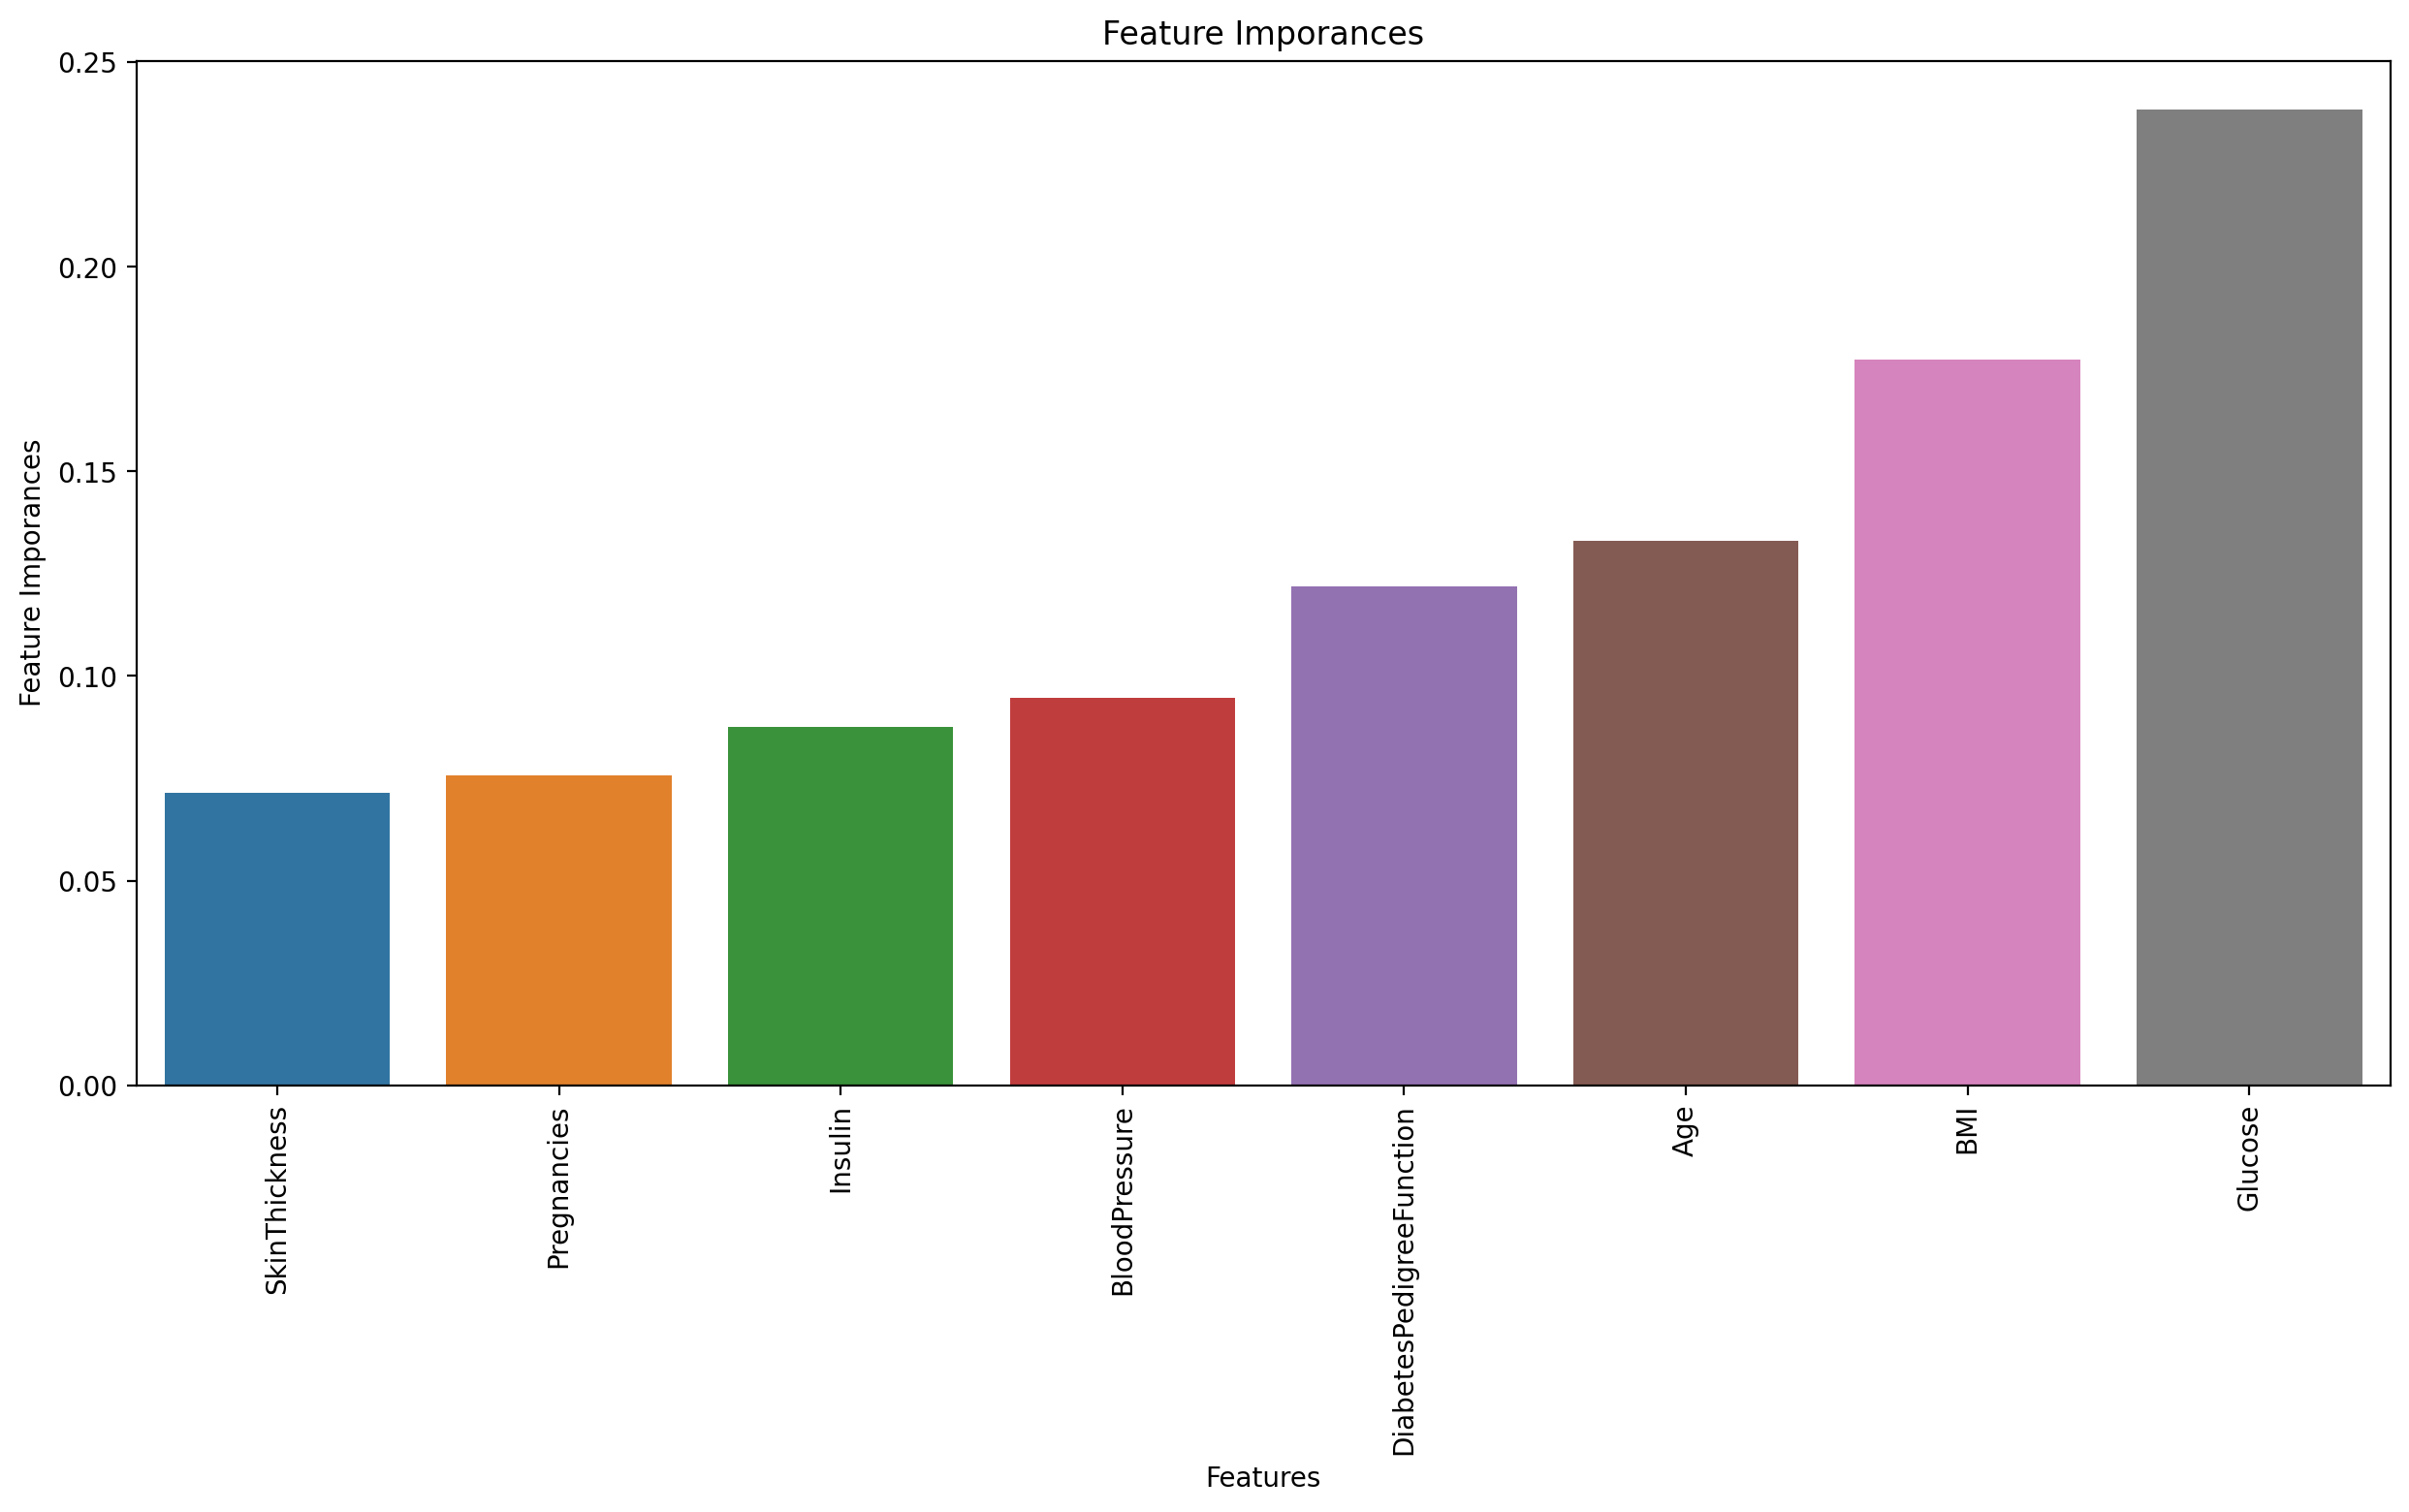

In [11]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=feature_importances,x="Features",y="Feature Imporances")
plt.title("Feature Imporances")
plt.xticks(rotation=90)
plt.show()

In [12]:
feature_importances["Feature Imporances"].cumsum()

3    0.071375
0    0.146979
4    0.234500
2    0.329193
6    0.451069
7    0.584062
5    0.761500
1    1.000000
Name: Feature Imporances, dtype: float64

In [13]:
random_forest

RandomForestClassifier()

In [14]:
y_pred = random_forest.predict(X_test)

In [15]:
cm = confusion_matrix(y_test,y_pred)

In [16]:
cm

array([[94, 14],
       [24, 36]])

In [17]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7738095238095238


In [18]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [19]:
recall_score(y_test,y_pred)

0.6

In [20]:
f1_score(y_test,y_pred)

0.6545454545454547

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       108
           1       0.72      0.60      0.65        60

    accuracy                           0.77       168
   macro avg       0.76      0.74      0.74       168
weighted avg       0.77      0.77      0.77       168



In [22]:
random_forest

RandomForestClassifier()

In [23]:


accuracies= cross_val_score(estimator=random_forest,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))



Average Accuracy: 76.83 %
Standart Deviation of Accuracies: 6.52 %


In [24]:


random_forest.predict(X_test)[:10]



array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [25]:
random_forests_params = {"max_depth": list(range(1,10)),
                         "max_features":[2,5,7, 8],
                         "n_estimators":[300,500,1000,1700,2000],
                         "criterion":["gini","entropy"]}

In [26]:
random_forest_classifier = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest_classifier,random_forests_params,cv=9,n_jobs=-1,verbose=2)

In [27]:
start_time = time.time()

random_forest_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Random Forests Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 360 candidates, totalling 3240 fits
Elapsed time for Random Forests Classifier cross validation: 6924.936 seconds


In [28]:
#best score
random_forest_cv.best_score_

0.7734308256696316

In [29]:
#best parameters
random_forest_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'n_estimators': 1700}

In [30]:
random_forest_tuned = RandomForestClassifier(criterion="gini",max_depth=5,max_features=2,
                                             n_estimators=500).fit(X_train,y_train)

In [31]:
random_forest_tuned

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=500)

In [32]:
y_pred = random_forest_tuned.predict(X_test)

In [33]:


cm = confusion_matrix(y_test,y_pred)



In [34]:
cm

array([[99,  9],
       [26, 34]])

In [35]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7916666666666666


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       108
           1       0.79      0.57      0.66        60

    accuracy                           0.79       168
   macro avg       0.79      0.74      0.75       168
weighted avg       0.79      0.79      0.78       168



In [37]:
Importances = pd.DataFrame({"Importance":random_forest_tuned.feature_importances_*100},index=X_train.columns)

In [38]:
Importances.head()

,Importance
Pregnancies,6.267967
Glucose,32.698132
BloodPressure,5.101630
SkinThickness,4.979287
Insulin,8.567210


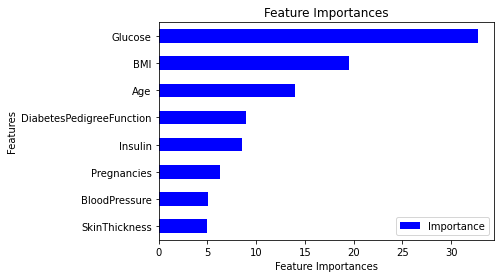

In [39]:
Importances.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances");